### User 정보 확인

## 

In [ ]:
import hashlib
import mysql.connector

def CheckUserInfo(user_info):
    db = mysql.connector.connect(
        host="database-1.cbcw28i2we7h.us-east-2.rds.amazonaws.com",
        user="ks",
        password="1234",
        database="nahonlab"
    )
    input_username = user_info[0]
    input_password = user_info[1]
    password_hash = hashlib.sha256(input_password.encode("utf-8")).hexdigest()

    cursor = db.cursor()
    query = """
    SELECT nickname, pw FROM user_sighup
    WHERE username = %s AND pw = %s
    """
    cursor.execute(query, (input_username, password_hash))

    # Fetch results
    result = cursor.fetchone()

    if result:
        print("login_success") # or 0 send TCP
    else:
        print("login_fail") # or 1send TCP

    cursor.close()
    db.close()


In [ ]:
import cv2

# Replace with your webcam's IP address and port
cap = cv2.VideoCapture("http://sunny:Tjsdnddl53746@@192.168.0.125/video")

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break
    
    # Display the frame
    cv2.imshow('Wireless Webcam', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture object and close windows
cap.release()
cv2.destroyAllWindows()


In [160]:
import ollama
import json

# Specify the model name
model = 'llama3.2'

# Define the prompt content
prompt_content = (
    "Create a daily meal plan as a JSON object with the following structure: "
    '{"breakfast": ["string (number g)", ...], "lunch": ["string (number g)", ...], '
    '"dinner": ["string (number g)", ...]}. '
    "Each meal should include a list of food items with their weights in grams, formatted as 'food name (weight g)'. "
    "The JSON object must be valid and contain no additional explanation or text."
)

# Construct the messages for Ollama
messages = [
    {"role": "user", "content": prompt_content}
]

# Call the model
response = ollama.chat(
    model=model,
    messages=messages
)

# Extract and parse the response content
response_content = response.get('message', {}).get('content', '')

# Parse directly into a dictionary
try:
    result_dict = json.loads(response_content)
    print(result_dict)  # Output the result as a dictionary
except json.JSONDecodeError as e:
    print("Error decoding JSON:", e)
    print("Raw content:", response_content)

Error decoding JSON: Expecting value: line 1 column 1 (char 0)
Raw content: Here is the daily meal plan:

{"breakfast": ["Scrambled Eggs (180 g)", "Whole Wheat Toast (30 g)", "Fresh Fruits (120 g)"], 
"Lunch": ["Grilled Chicken Breast (140 g)", "Mixed Greens Salad (20 g)", "Quinoa (80 g)"], 
"Dinner": ["Baked Salmon (200 g)", "Roasted Vegetables (100 g)", "Brown Rice (150 g)"]}


In [161]:
import ollama
import json

# Specify the model name
model = 'llama3.2'

# Define the prompt content
prompt_content = (
    "다음 구조로 JSON 객체 형태로 하루 식단을 작성하세요. "
    "탄수화물: 77g, 단백질: 46g, 지방: 25g 이 목표입니다. 결과물은 무조건 한국어여야 됩니다: "
    '{"아침": ["string (number g)", ...], "점심": ["string (number g)", ...], "저녁": ["string (number g)", ...]}. '
    "각 식사는 음식 항목과 그램 단위의 무게를 포함해야 하며, '음식 이름 (무게 g)' 형식으로 작성해야 합니다. "
    "JSON 객체는 유효해야 하며 추가적인 설명이나 텍스트는 포함하지 마세요."
)

# Construct the messages for Ollama
messages = [
    {"role": "user", "content": prompt_content}
]

# Call the model
response = ollama.chat(
    model=model,
    messages=messages
)

# Extract and parse the response content
response_content = response.get('message', {}).get('content', '')

# Parse directly into a dictionary
try:
    result_dict = json.loads(response_content)
    print(result_dict)  # Output the result as a dictionary
except json.JSONDecodeError as e:
    print("Error decoding JSON:", e)
    print("Raw content:", response_content)

{'아침': ['고구마(150g)', '자두 1개(30g)', '과일 사리안(100g)'], '점심': ['계란 2개(140g)', '고추장 쌀밥 200g', '이celand 피스 120g'], '저녁': ['치즈 80g', '요거트 150g', '영양바 20g']}


In [102]:
db = mysql.connector.connect(
        host="database-1.cbcw28i2we7h.us-east-2.rds.amazonaws.com",
        user="ks",
        password="1234",
        database="nahonlab"
    )
cursor = db.cursor()
query = """
SELECT 
    el.exercise_name,
    DATE(etl.performed_at) AS exercise_date,
    SUM(er.exercise_cnt) AS total_count,
    SUM(er.exercise_set) AS total_set
FROM 
    exercise_time_log etl
JOIN 
    exercise_record er ON etl.exercise_time_id = er.exercise_time_id
JOIN 
    exercise_list el ON er.exercise_id = el.exercise_id
WHERE 
    etl.user_id = 34
    AND DATE(etl.performed_at) BETWEEN '2024-11-11' AND '2024-11-16'
GROUP BY 
    exercise_date, el.exercise_name
ORDER BY 
    exercise_date, el.exercise_name;
"""
cursor.execute(query, (input_username, password_hash))

# Fetch results
result = cursor.fetchone()

NameError: name 'input_username' is not defined

In [151]:
def GetUserAnalyticsGraph(self, Current_User_ID, date_from, date_to):
        db = mysql.connector.connect(
            host="database-1.cbcw28i2we7h.us-east-2.rds.amazonaws.com",
            user="ks",
            password="1234",
            database="nahonlab"
        )

        query = """
        SELECT 
            el.exercise_name,
            DATE(etl.performed_at) AS exercise_date,
            SUM(er.exercise_cnt) AS total_count,
            SUM(er.exercise_set) AS total_set
        FROM 
            exercise_time_log etl
        JOIN 
            exercise_record er ON etl.exercise_time_id = er.exercise_time_id
        JOIN 
            exercise_list el ON er.exercise_id = el.exercise_id
        WHERE 
            etl.user_id = %s
            AND DATE(etl.performed_at) BETWEEN %s AND %s
        GROUP BY 
            exercise_date, el.exercise_name
        ORDER BY 
            exercise_date, el.exercise_name;
        """

        cursor = db.cursor()
        cursor.execute(query, (Current_User_ID, date_from , date_to ))

        result = cursor.fetchall()
        columns = [col[0] for col in cursor.description]

        df = pd.DataFrame(result, columns=columns)
        db.close()

        df['exercise_date'] = pd.to_datetime(df['exercise_date'])
        df['total_count'] = pd.to_numeric(df['total_count'], errors='coerce')
        df = df.dropna(subset=['total_count'])
        df['exercise_date'] = df['exercise_date'].dt.date

        pivot_df = df.pivot_table(
            index='exercise_date',
            columns='exercise_name',
            values='total_count',
            aggfunc='sum',
            fill_value=0
        )

        # Create a figure and plot the data
        fig, ax = plt.subplots(figsize=(10, 6))
        pivot_df.plot(kind='bar', stacked=True, ax=ax, colormap='cool')

        # Annotate the bars
        for idx, rect_group in enumerate(ax.containers):
            for rect in rect_group:
                height = rect.get_height()
                if height > 0:
                    x = rect.get_x() + rect.get_width() / 2
                    y = rect.get_y() + height / 2
                    ax.text(
                        x,
                        y,
                        f'{int(height)}',
                        ha='center',
                        va='center',
                        fontsize=10,
                        color='black'
                    )

        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('Date', fontsize=12)
        ax.set_title(f'{date_from}부터 {date_to}까지의 운동 통계', fontsize=14)
        plt.xticks(rotation=45, fontsize=10)

        # Return the figure to be used in the canvas
        buf = BytesIO()
        fig.savefig(buf, format="png", bbox_inches="tight")
        buf.seek(0)

        # Read the image into a QPixmap
        pixmap = QPixmap()
        pixmap.loadFromData(buf.getvalue())
        buf.close()
        
        # Return the QPixmap to be used in your QLabel
        return pixmap  

In [156]:
from datetime import timedelta, datetime
date_from = (datetime.today() - timedelta(weeks=1)).date()
date_from

datetime.date(2024, 12, 7)

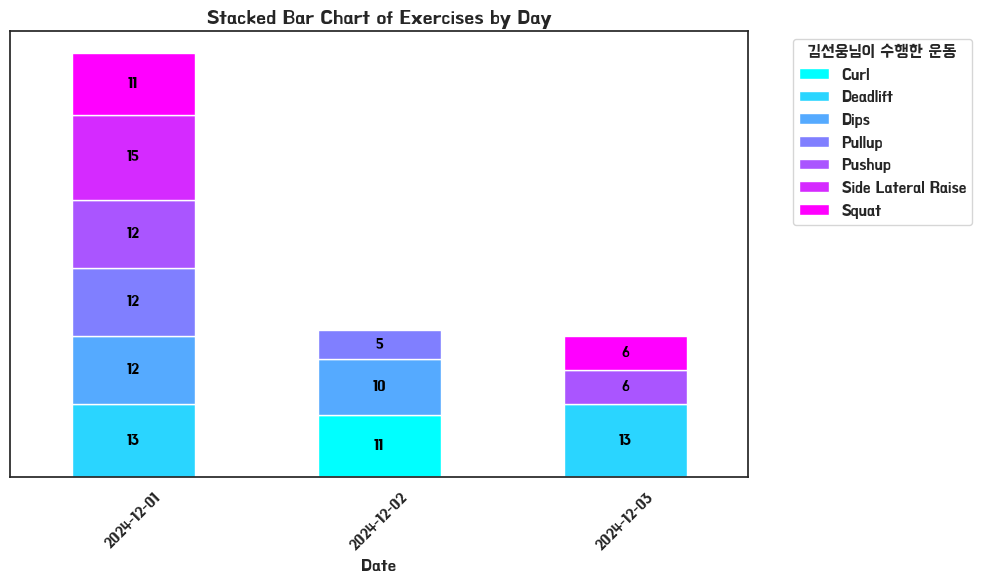

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, font_manager

font_path = '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/157acc4d862730d6d5beaa943546f80a71948c7b.asset/AssetData/BMHanna11yrs-Regular.otf'
prop = font_manager.FontProperties(fname=font_path)
rcParams['font.family'] = prop.get_name()
rcParams['font.weight'] = 'normal'

User_Name = '김선웅'

df['exercise_date'] = pd.to_datetime(df['exercise_date'])
df['total_count'] = pd.to_numeric(df['total_count'], errors='coerce')
df = df.dropna(subset=['total_count'])
df['exercise_date'] = df['exercise_date'].dt.date

pivot_df = df.pivot_table(
    index='exercise_date',
    columns='exercise_name',
    values='total_count',
    aggfunc='sum',
    fill_value=0
)

fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_df.plot(kind='bar', stacked=True, ax=ax, colormap='cool')

for idx, rect_group in enumerate(ax.containers):
    for rect in rect_group:
        height = rect.get_height()
        if height > 0:
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_y() + height / 2
            ax.text(
                x,
                y,
                f'{int(height)}',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Stacked Bar Chart of Exercises by Day', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

ax.legend(title=f'{User_Name}님이 수행한 운동', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.patch.set_alpha(0)
ax.set_facecolor('none')

plt.tight_layout()
plt.show()

In [82]:
import matplotlib.font_manager as fm

# List all available fonts and filter by 'BM' (case-insensitive)
available_fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
bm_fonts = [font for font in available_fonts if 'bm' in font.lower()]

# Print the found fonts
bm_fonts

['/System/Library/AssetsV2/com_apple_MobileAsset_Font7/157acc4d862730d6d5beaa943546f80a71948c7b.asset/AssetData/BMHanna11yrs-Regular.otf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/5b2f5f0b003344b2c67ce463e76d2485bb43d054.asset/AssetData/BMJua-Regular.otf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/10b097deccb3c6126d986e24b1980031ff7399da.asset/AssetData/TsukushiBMaruGothic.ttc',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/5f2614e7b55639e709d8578e16b324b3eb6eb065.asset/AssetData/BMHannaPro-Regular.otf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/cd59971ded42add9070aa2172265ba7fcf8d9327.asset/AssetData/BMKirangHaerang-Regular.otf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/9bcdfd464af84ab30592d781f4a82f44f548239c.asset/AssetData/BMYeongSung-Regular.otf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/e71ea5469e5f2039223f22203ee8b9186524afd3.asset/AssetData/BMDoHyeon-Regular.otf',
 '/System/Library/AssetsV2/com_apple_M

In [138]:
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

today

'2024-12-14'

SyntaxError: invalid decimal literal (2220781458.py, line 7)

In [166]:
res = 'RequestLogin&&True&&34&&김선웅'
res = res.split('&&')

res[1]

'True'

In [ ]:
def MealAI(carb, protein, fat):
    import ollama
    import json

    model = 'llama3.2'

    prompt_content1 = (
    "Create a daily meal plan as a JSON object with the following structure: "
    '{"breakfast": ["string (number g)", ...], "lunch": ["string (number g)", ...], '
    '"dinner": ["string (number g)", ...]}. '
    "Each meal should include a list of food items with their weights in grams, formatted as 'food name (weight g)'. "
    "I want at least 3 types of foods for each meal"
    "The JSON object must be valid and contain no additional explanation or text."
    )
    # Constructing the prompt
    prompt_content2 = (
        "다음 구조로 JSON 객체 형태로 하루 식단을 작성하세요. "
        f"탄수화물: {carb}g, 단백질: {protein}g, 지방: {fat}g 이 목표입니다. 결과물은 무조건 한국어여야 됩니다: "
        '{"아침": ["string (number g)", ...], "점심": ["string (number g)", ...], "저녁": ["string (number g)", ...]}. '
        "각 식사는 음식 항목과 그램 단위의 무게를 포함해야 하며, '음식 이름 (무게 g)' 형식으로 작성해야 합니다. "
        "JSON 객체는 유효해야 하며 추가적인 설명이나 텍스트는 포함하지 마세요."
    )

    messages = [
        {"role": "user", "content": prompt_content}
    ]

    try:
        # API call to Ollama
        response = ollama.chat(
            model=model,
            messages=messages
        )

        # Extracting and parsing the response
        response_content = response.get('message', {}).get('content', '')
        if not response_content:
            print("Error: No content in response.")
            return None
        
        result_dict = json.loads(response_content)
        
        # Returning the result
        return result_dict

    except json.JSONDecodeError:
        print("Error: The response could not be parsed as JSON.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example Usage
meal_plan = MealAI(100, 100, 70)
if meal_plan:
    print(meal_plan)


{'아침': ['가당초 (50g)', '고구마 (40g)', '간장 고기 (10g)'], '점심': ['고무자두 (100g)', '토마토 소스 (30g)', '치킨 (70g)'], '저녁': ['감자 (60g)', '오이 (50g)', '버터 차가्त (80g)']}


In [ ]:
from importlib.metadata import requires

# from PyQt5.QtGui.QIcon import pixmap
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import *
from PyQt5 import uic
import os
import sys
import socket
import numpy as np
import time
import base64
import cv2
from PyQt5.QtGui import QPixmap
from PyQt5.QtWidgets import QMainWindow, QApplication, QLabel
import hashlib
import select
import mysql.connector
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
import pandas as pd
from io import BytesIO
from PyQt5.QtCore import QThread, pyqtSignal

current_dir = os.path.dirname(os.path.abspath(__file__))
profile = uic.loadUiType(os.path.join(current_dir, 'profile.ui'))[0]

class SunnyProfileWindow(QMainWindow, profile):
    def __init__(self, control):
        super(SunnyProfileWindow, self).__init__()
        self.control = control
        self.cap = None
        self.setupUi(self)

        # Navigation bar Design Setup
        self.btn_home.setStyleSheet("""
                                    QPushButton {
                                        border-image: url(SolCareGUI/img/home.png);
                                        background-color: rgb(255, 255, 255,0);
                                        border: 1px solid #2E7D32;
                                        border-radius: 5px; 
                                        padding: 5px;
                                        }
                                    """)
        self.btn_camera.setStyleSheet("""
                                    QPushButton {
                                        border-image: url(SolCareGUI/img/VideoStabilization.png);
                                        background-color: rgb(255, 255, 255,0);
                                        border: 1px solid #2E7D32;
                                        border-radius: 5px; 
                                        padding: 5px;
                                        }
                                    """)
        self.btn_profile.setStyleSheet("""
                                    QPushButton {
                                        border-image: url(SolCareGUI/img/User.png);
                                        background-color: rgb(255, 255, 255,0);
                                        border: 1px solid #2E7D32;
                                        border-radius: 5px; 
                                        padding: 5px;
                                        }
                                    """)
        self.lb_menu.setStyleSheet("""
                            QLabel {
                                border-image: url('SolCareGUI/img/profile_menu.png');
                                background-repeat: no-repeat;
                                background-position: center;
                                border: none; 
                            }
                        """)
        self.btn_security.setStyleSheet("""
                            QPushButton {
                                border-image: url(SolCareGUI/img/Siren.png);
                                border: 1px solid #2E7D32;
                                border-radius: 5px; 
                                padding: 5px;
                                }
                            """)         

    def MealAI(self, carb, protein, fat):
        
        import ollama
        import json

        model = 'llama3.2'

        prompt_content = (
            "다음 구조로 JSON 객체 형태로 하루 식단을 작성하세요. "
            f"탄수화물: {carb}g, 단백질: {protein}g, 지방: {fat}g 이 목표입니다. 결과물은 무조건 한국어여야 됩니다: "
            '{"아침": ["string (number g)", ...], "점심": ["string (number g)", ...], "저녁": ["string (number g)", ...]}. '
            "각 식사는 음식 항목과 그램 단위의 무게를 포함해야 하며, '음식 이름 (무게 g)' 형식으로 작성해야 합니다. "
            "JSON 객체는 유효해야 하며 추가적인 설명이나 텍스트는 포함하지 마세요."
        )

        messages = [
            {"role": "user", "content": prompt_content}
        ]

        response = ollama.chat(
            model=model,
            messages=messages
        )

        response_content = response.get('message', {}).get('content', '')

        try:
            result_dict = json.loads(response_content)
            print(result_dict) 
        except json.JSONDecodeError as e:
            print("Error decoding JSON:", e)
            print("Raw content:", response_content)
        msg_box = QMessageBox()
        msg_box.setWindowTitle("식단 추천 결과")
        msg_box.setText("하루 식단 추천 결과입니다:")
        msg_box.setDetailedText(result_dict)
        msg_box.setStandardButtons(QMessageBox.Ok)
        msg_box.exec()
    

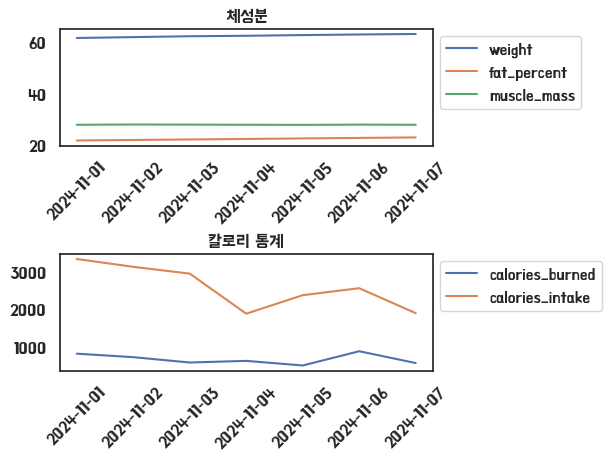

: 

In [ ]:
Current_User_ID = 34
from_date = '2024-11-1'
to_date = '2024-11-7'

db = mysql.connector.connect(
    host="database-1.cbcw28i2we7h.us-east-2.rds.amazonaws.com",
    user="ks",
    password="1234",
    database="nahonlab"
)

query = """
    SELECT 
        record_date, 
        weight, 
        fat_percent, 
        muscle_mass, 
        calories_burned, 
        calories_intake
    FROM 
        user_body_metrics
    WHERE 
        user_id = %s 
        AND record_date BETWEEN %s AND %s
    ORDER BY 
        record_date ASC;
    """
cursor = db.cursor(dictionary=True)
cursor.execute(query, (Current_User_ID, from_date, to_date))
result = cursor.fetchall()
cursor.close()
data = pd.DataFrame(result)

fig, axs = plt.subplots(2, 1, figsize=(6, 4.5), constrained_layout=True)


for metric in ['weight', 'fat_percent', 'muscle_mass']:
    if metric in data.columns:
        axs[0].plot(data['record_date'], data[metric], label=metric)

axs[0].set_title('체성분')
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))  
axs[0].tick_params(axis='x', rotation=45)

#두번째 plot
for metric in ['calories_burned', 'calories_intake']:
    if metric in data.columns:
        axs[1].plot(data['record_date'], data[metric], label=metric)

axs[1].set_title('칼로리 통계')
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1)) 
axs[1].tick_params(axis='x', rotation=45) 

canvas = FigureCanvas(fig)
buf = BytesIO()
canvas.print_png(buf)
buf.seek(0)
pixmap = QPixmap()
pixmap.loadFromData(buf.getvalue())
buf.close()

In [10]:
# [('Dips', datetime.date(2024, 12, 20), Decimal('10')), ('Pullup', datetime.date(2024, 12, 20), Decimal('12')), ('Pushup', datetime.date(2024, 12, 20), Decimal('10'))]

import datetime
from decimal import Decimal

response= "RequestTodayAnalytics&&[('Dips', datetime.date(2024, 12, 20), Decimal('10')), ('Pullup', datetime.date(2024, 12, 20), Decimal('12')), ('Pushup', datetime.date(2024, 12, 20), Decimal('10'))]"

# s_result.split('&&')
# result = []

# exec(f"""result = {s_result}""")

# print(result)

# print(result[0][1])
# print(type(result[0][1]))

parts = response.split('&&')

s_result = parts[1]
print(s_result)
print(type(s_result))
result = []
exec(f"""result = {s_result}""")
print(result)
print(type(result[0][1]))

[('Dips', datetime.date(2024, 12, 20), Decimal('10')), ('Pullup', datetime.date(2024, 12, 20), Decimal('12')), ('Pushup', datetime.date(2024, 12, 20), Decimal('10'))]
<class 'str'>
[('Dips', datetime.date(2024, 12, 20), Decimal('10')), ('Pullup', datetime.date(2024, 12, 20), Decimal('12')), ('Pushup', datetime.date(2024, 12, 20), Decimal('10'))]
<class 'datetime.date'>


AttributeError: 'datetime.date' object has no attribute 'toString'

In [1]:
import PIL

print(PIL.__version__)

11.0.0
